In [9]:
import os
import cv2

import numpy as np

from pathlib import Path
from typing import Union
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from matplotlib import pyplot as plt

cfg = get_cfg()
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("dataset2_01","dataset2_02")
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4 
cfg.SOLVER.BASE_LR = 0.0001  
cfg.SOLVER.MAX_ITER = 60000    
cfg.SOLVER.STEPS = []       
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 
cfg.SOLVER.CHECKPOINT_PERIOD = 1000


cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0029999.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [20]:
# im = cv2.imread("/home/yangfei/cobot_dataset_pipeline/data/dataset_v2_truncated/scene_41/1632534247.08.png")
# im = cv2.imread("/home/yangfei/synthetic_dataset/test/images/000000.png")
# im = cv2.imread("/home/yangfei/synthetic_dataset/test/images/zedmini.png")
# im = cv2.imread("/home/yangfei/cobot_dataset_pipeline/data/dataset_v2_truncated/scene_48/1632539184.94.png")
# im = cv2.imread("1632539184.94.png")
im = cv2.imread("Image__2023-06-19__16-04-22.png")
# im = cv2.imread("test_04.png")

outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

v = Visualizer(im[:, :, ::-1],
                scale=1, 
)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [19]:
def plot_im(img: Union[str, Path, np.ndarray], figsize=(10,10)):
    
    if not isinstance(img, np.ndarray):
        assert Path(img).exists(), f"{img} is not a valid path"
        img = cv2.imread(str(img))
    
    try:
        if img.shape[-1] == 3:
            cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except Exception as e:
        pass
    
    fig = plt.figure(figsize=figsize,tight_layout=True)
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    fig.set_tight_layout(True)
    plt.imshow(img)
    plt.savefig('50k_2.png')

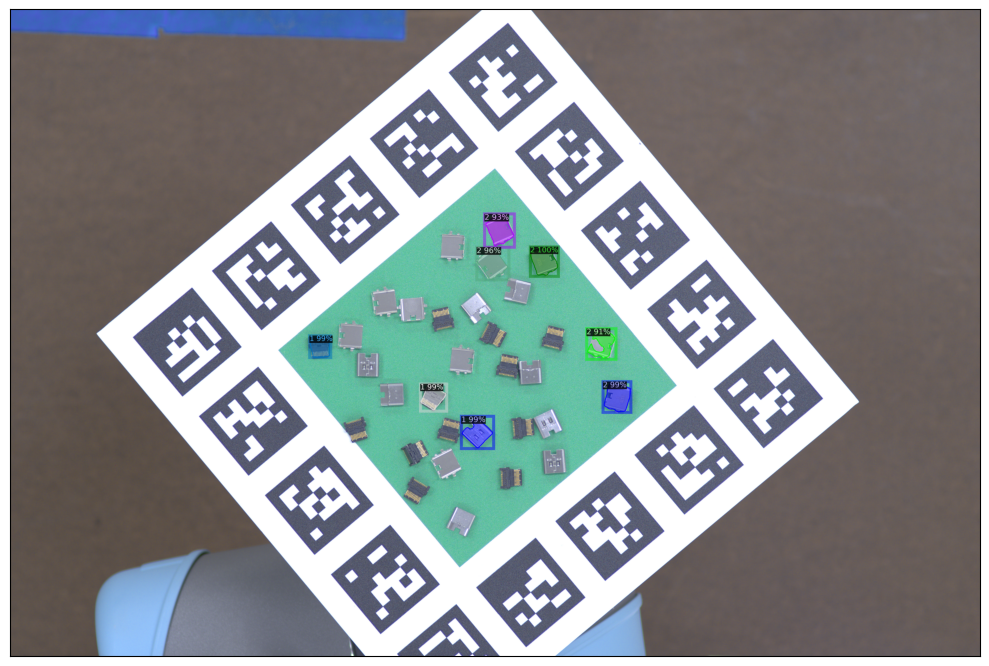

In [21]:
result = out.get_image()
plot_im(result)

In [5]:
result.shape

(3648, 5472, 3)

In [21]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

Launching TensorBoard...

KeyboardInterrupt: 